<a href="https://colab.research.google.com/github/rajveer0104/Deep-Learning/blob/main/Types_of_gradient_descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/homeprices_banglore.csv')

In [ ]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
sx=MinMaxScaler()
sy=MinMaxScaler()

In [ ]:
scaled_X=sx.fit_transform(df.drop(columns='price',axis='columns'))
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [ ]:
def batch_gradient_descent(X,Y_true,epochs,learning_rate=0.01):
  number_of_features=X.shape[1]
  w=np.ones(shape=(number_of_features))
  b=-0
  cost_list=[]
  epoch_list=[]
  total_samples=X.shape[0]
  for i in range (epochs):
    Y_predicted=np.dot(w,X.T)+b

    w_grad=-(2/total_samples)*(X.T.dot(Y_true-Y_predicted))
    b_grad=-(2/total_samples)*np.sum(Y_true-Y_predicted)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost = np.mean(np.square(Y_true-Y_predicted))
    if(i%10==0):
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)

In [ ]:
print(w,b,cost,cost_list,epoch_list)

[0.70712464 0.67456527] -0.23034857438407427 0.0068641890429808105 [np.float64(0.2768777174681), np.float64(0.16573507027671064), np.float64(0.10212908135956808), np.float64(0.06564235879682481), np.float64(0.04463022365578522), np.float64(0.03245122421764872), np.float64(0.025317339083010492), np.float64(0.021067914076635823), np.float64(0.01847041893523527), np.float64(0.016821657535428185), np.float64(0.015720331469182485), np.float64(0.014937329116527901), np.float64(0.014341749105819087), np.float64(0.0138587099774241), np.float64(0.013445288028074867), np.float64(0.013076793952344979), np.float64(0.012738945874049962), np.float64(0.012423405193086517), np.float64(0.012125230310262438), np.float64(0.011841424159334757), np.float64(0.011570105565415722), np.float64(0.011310036391930275), np.float64(0.01106035160957391), np.float64(0.010820405104702651), np.float64(0.010589681505198633), np.float64(0.010367745666240432), np.float64(0.010154213642862602), np.float64(0.009948735925187

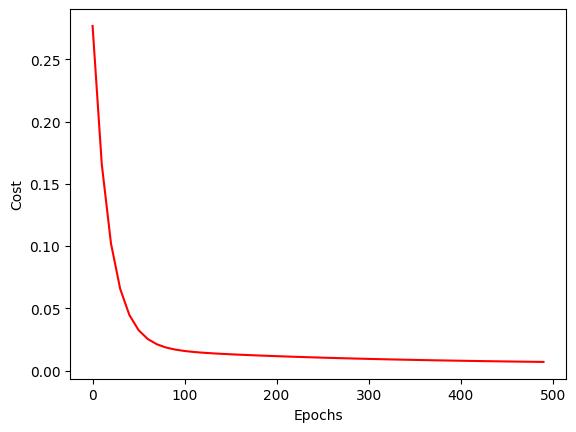

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list,cost_list,color='red')

In [ ]:
def predict(area,bedrooms,w,b):
  scaled_X=sx.transform([[area,bedrooms]])[0]

  scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(1000,2,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.253094462442355)

In [ ]:
import random
def stochastic_gradient_descent(X,Y_true,epochs,learning_rate=0.01):
  number_of_features=X.shape[1]
  w=np.ones(shape=(number_of_features))
  b=-0
  cost_list=[]
  epoch_list=[]
  total_samples=X.shape[0]
  for i in range (epochs):
    random_idx=random.randint(0,total_samples-1)
    sample_X=X[random_idx]
    sample_Y=Y_true[random_idx]
    Y_predicted=np.dot(w,sample_X)+b

    w_grad=-(2/total_samples)*(sample_X.T.dot(sample_Y-Y_predicted))
    b_grad=-(2/total_samples)*(sample_Y-Y_predicted)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost=np.square(sample_Y-Y_predicted)
    if(i%100==0):# at every 100 th iteration record the cost and epoch value
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.70706729, 0.67352594]),
 np.float64(-0.22799690077787546),
 np.float64(0.0020957088443052966))

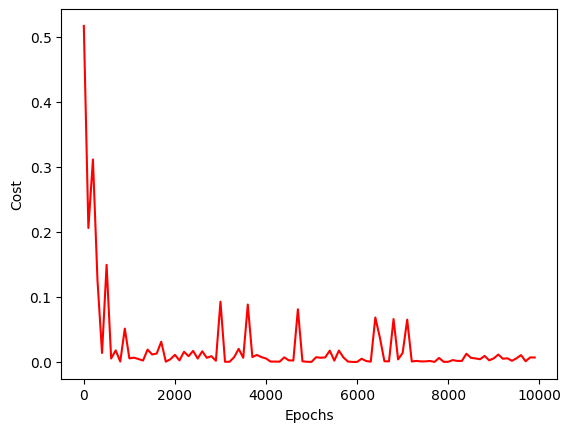

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd,cost_list_sgd,color='red')